# **Setup**

In [8]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Conv3D, BatchNormalization, Activation
from keras import backend as K
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import pandas as pd

from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [9]:
classes = os.listdir('../input/brain-tumor-classification-mri/Training')

In [10]:
enc = OneHotEncoder()
enc.fit([[0], [1], [2], [3]]) 
def names(number):
    if(number == 0):
        return classes[0]
    elif(number == 1):
        return classes[1]
    elif(number == 2):
        return classes[2]
    elif(number == 3):
        return classes[3]


/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


# **Data Split**

In [11]:
trainData = []
trainLabel = []
dim = (150, 150)
trainPath = "../input/brain-tumor-classification-mri/Training"
index = 0
for dir in os.listdir(trainPath):
    filePaths = []
    subDir = os.path.join(trainPath, dir)
    for file in os.listdir(subDir):
        imgFullPath = os.path.join(subDir, file)
        filePaths.append(imgFullPath)
        img = Image.open(imgFullPath)
        x = img.resize(dim)
        x = np.array(x)
        trainData.append(np.array(x))
        trainLabel.append(enc.transform([[index]]).toarray())
    print(names(index))
    print(str(dir))
    index += 1
    
trainData = np.array(trainData)
trainLabel = np.array(trainLabel).reshape(2870, 4)
print(trainData.shape)
print(trainLabel.shape)

no_tumor
no_tumor
pituitary_tumor
pituitary_tumor
meningioma_tumor
meningioma_tumor
glioma_tumor
glioma_tumor
(2870, 150, 150, 3)
(2870, 4)


In [12]:
testData = []
testLabel = []
dim = (150, 150)
testPath = "../input/brain-tumor-classification-mri/Testing"
index = 0
for dir in os.listdir(testPath):
    filePaths = []
    subDir = os.path.join(testPath, dir)
    for file in os.listdir(subDir):
        imgFullPath = os.path.join(subDir, file)
        filePaths.append(imgFullPath)
        img = Image.open(imgFullPath)
        x = img.resize(dim)
        x = np.array(x)
        testData.append(np.array(x))
        testLabel.append(enc.transform([[index]]).toarray())
    print(names(index))
    print(str(dir))
    index += 1
testData = np.array(testData)
testLabel = np.array(testLabel).reshape(394, 4)
print(testData.shape)
print(testLabel.shape)

no_tumor
no_tumor
pituitary_tumor
pituitary_tumor
meningioma_tumor
meningioma_tumor
glioma_tumor
glioma_tumor
(394, 150, 150, 3)
(394, 4)


# **Building the Model**

In [13]:
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (150,150,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 128, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))
 
model.add(Flatten())
model.add(Dense(1024, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(4, activation = "softmax"))
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
epochs = 50  
batch_size = 40

datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=0,
        zoom_range = 0,
        width_shift_range=0,  
        height_shift_range=0,  
        horizontal_flip=True,  
        vertical_flip=False)  

In [18]:
# history = model.fit(trainData, trainLabel,batch_size = 32, epochs = 19, verbose=1,validation_data=(testData, testLabel))
datagen.fit(trainData)
history = model.fit_generator(datagen.flow(trainData,trainLabel, batch_size=batch_size),
                              epochs = epochs, validation_data = (testData,testLabel),
                              steps_per_epoch = trainData.shape[0] // batch_size)    

Epoch 1/50
71/71 [==============================] - 4s 59ms/step - loss: 16.8713 - accuracy: 0.3756 - val_loss: 1.4123 - val_accuracy: 0.2386
Epoch 2/50
71/71 [==============================] - 4s 50ms/step - loss: 1.1657 - accuracy: 0.4813 - val_loss: 1.5346 - val_accuracy: 0.2716
Epoch 3/50
71/71 [==============================] - 4s 51ms/step - loss: 1.0112 - accuracy: 0.5580 - val_loss: 1.4941 - val_accuracy: 0.3249
Epoch 4/50
71/71 [==============================] - 4s 52ms/step - loss: 0.9111 - accuracy: 0.6134 - val_loss: 1.4856 - val_accuracy: 0.3452
Epoch 5/50
71/71 [==============================] - 4s 50ms/step - loss: 0.8094 - accuracy: 0.6495 - val_loss: 1.4172 - val_accuracy: 0.3477
Epoch 6/50
71/71 [==============================] - 4s 51ms/step - loss: 0.7371 - accuracy: 0.6929 - val_loss: 1.5740 - val_accuracy: 0.3807
Epoch 7/50
71/71 [==============================] - 4s 55ms/step - loss: 0.6659 - accuracy: 0.7251 - val_loss: 1.6661 - val_accuracy: 0.3274
Epoch 8/50
7

In [19]:
model.save("brain-tumor-model.h5")

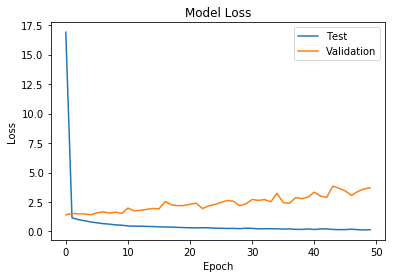

In [20]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

# **Prediction**

99.91077780723572% Confidence This Is no_tumor


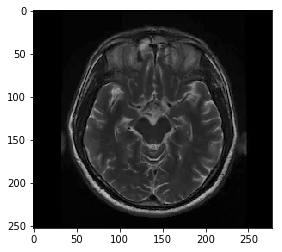

In [65]:
img = Image.open('../input/brain-tumor-classification-mri/Testing/no_tumor/image(104).jpg')
x = np.array(img.resize(dim))
x = x.reshape(1,150,150,3)
answ = model.predict_on_batch(x)
classification = np.where(answ == np.amax(answ))[1][0]
imshow(img)
print(str(answ[0][classification]*100) + '% Confidence This Is ' + names(classification))